In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("C://Users/sz/Desktop/practice/take_home_challenges/")
import helper_f
import matplotlib.pyplot as plt
%matplotlib inline

## Questions to analyze

1. Should the company sell its software for \$39 or \$59?
2. A holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are main findings looking at the data?
3. The VP of Product feels that the test has been running for too long and he should have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days you would have stopped the test? Please, explain why.

Read data

In [2]:
result = pd.read_csv("test_results.csv")
user = pd.read_csv("user_table.csv")

In [3]:
result.head(3)

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0


In [4]:
user.head(3)

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39


Check null: good to know that every column contains no null value

In [5]:
print("result table")
for col in result.columns:
    print("{} has {} percent of null values".format(col, result[col].isnull().sum()))
print("User table")
for col in user.columns:
    print("{} has {} percent of null values".format(col, user[col].isnull().sum()))

result table
user_id has 0 percent of null values
timestamp has 0 percent of null values
source has 0 percent of null values
device has 0 percent of null values
operative_system has 0 percent of null values
test has 0 percent of null values
price has 0 percent of null values
converted has 0 percent of null values
User table
user_id has 0 percent of null values
city has 0 percent of null values
country has 0 percent of null values
lat has 0 percent of null values
long has 0 percent of null values


join two tables

In [6]:
data = pd.merge(result, user, how='inner', on = 'user_id')
data.head(3)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73


**Analyze conversion rate of experiment and control group** <br> Based on plot below, we find that control group has a higher conversion rate than experiment group, meaning that raising price does not show effect by now

Text(0,0.5,'conversion rate')

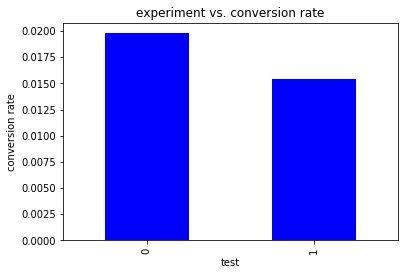

In [7]:
test = data.groupby(['test'])['converted'].mean()
test.plot(kind = 'bar', title = 'experiment vs. conversion rate', color = 'b')
plt.ylabel('conversion rate')

### Analyze source, device, operating system, country, city sequentially

**Source** first
1. friend_referrel leads to highest conversion rate, while *bing* ads lead to lowest conversion rate. ads department could consider paying less for ads on bing
2. When looking at specific company or ads segment, we found that google/facebook have significantly higher conversion rate than bings
3. ads has a slightly higher conversion rate than seo, so ads are actually paying back
4. The company could think of more incentives to ask more users to refer friends to this website since friend referral leads to highest conversion rate

Text(0,0.5,'conversion rate')

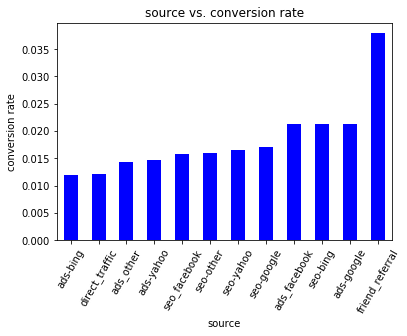

In [8]:
source = data.groupby(['source'])['converted'].mean().sort_values()
source.plot(kind = 'bar', title = 'source vs. conversion rate', rot = 60, color = 'b')
plt.ylabel("conversion rate")

In [9]:
#create a new column to analyze the effect of ads and seo
data['broad_source'] = data['source'].apply(lambda string: string.split('-')[0] if '-' in string else string.split('_')[0])
data['specific_company'] = data['source'].apply(lambda string: string.split('-')[1] if '-' in string else string.split('_')[1])
data.head(3)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,broad_source,specific_company
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,ads,facebook
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,seo,google
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,ads,bing


Text(0,0.5,'conversion rate')

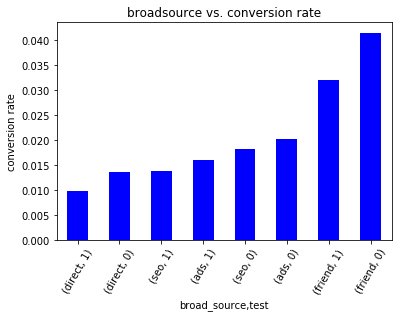

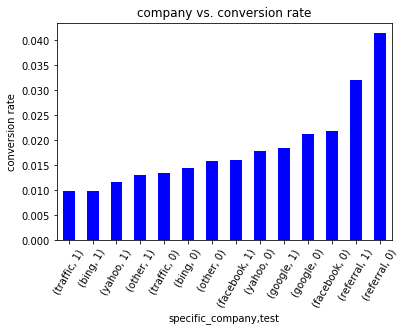

In [10]:
broad_source = data.groupby(['broad_source', 'test'])['converted'].mean().sort_values()
company = data.groupby(['specific_company', 'test'])['converted'].mean().sort_values()

plt.figure()
broad_source.plot(kind = 'bar', title='broadsource vs. conversion rate', rot=60, color = 'b')
plt.ylabel('conversion rate')

plt.figure()
company.plot(kind = 'bar', title ='company vs. conversion rate', rot = 60, color = 'b')
plt.ylabel('conversion rate')

**device** and **operating system**

Based on below plot, <br>
1. mobile and web has only a slight difference in terms of conversion rate for control group. However, for experiment group, this difference becomes larger and users are more likely to convert on mobile apps. <br> 
2. Similarly, we also found that for either device, users in control group are more likely to convert 

Text(0,0.5,'conversion rate')

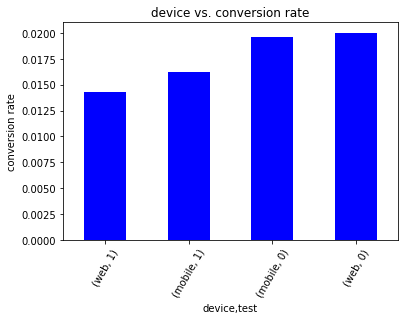

In [11]:
device = data.groupby(['device','test'])['converted'].mean().sort_values()
device.plot(kind = 'bar', color='b', title = 'device vs. conversion rate', rot = 60)
plt.ylabel('conversion rate')

Analysis of operating system leads to interesting findings.<br>
The difference between conversion rate of each system varies by a moderate margin. Mac system leads to highesst rate, while linux system leads to much lower rate. Based on this result, the product or engineering team might need to check out if there is any bugs on windows/linux system that prohibits conversion

Text(0,0.5,'conversion rate')

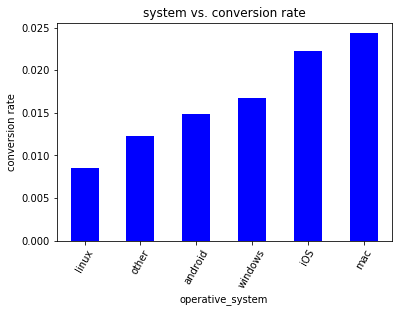

In [12]:
system = data.groupby(['operative_system'])['converted'].mean().sort_values()
system.plot(kind = 'bar', color ='b', title = 'system vs. conversion rate', rot = 60)
plt.ylabel('conversion rate')

analyze **country** and **city**
1. USA is the only country
2. There are too many cities, and some cities have zero conversion rate. We should look at cities that appear at least 1200 times, and analyze those cities
3. Very interesting, those cities in the southern state have higher conversion rates: Austin, Memphis, Tucson, etc. This could be related to the **product nature**. Maybe people at south needs this software more than people at other regions. Another possibility is that ads works better in South than in other areas

In [13]:
city = data.groupby(['city'])['converted'].count().sort_values()
city_data = data[data['city'].isin(city[city.values > 1200].index)]
city_series = city_data.groupby(['city'])['converted'].mean().sort_values()

Text(0,0.5,'conversion rate')

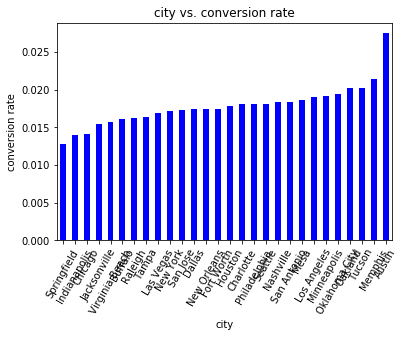

In [14]:
city_series.plot(kind = 'bar', title = 'city vs. conversion rate', rot = 60, color = 'b')
plt.ylabel("conversion rate")

### Analyze statistical significance of the result

We want to apply t-test to find out p-value to verify statistical significance. <br>
Because t-score is 8.483 and p value < 0.05, the result is statistically significant, and there is a difference in conversion rate between control and experiment group

In [15]:
import scipy
t_score = helper_f.t_test(data, 'test', 'converted')
print("t-test result: {:.3f}".format(t_score))
print("p value is: {}".format(scipy.stats.t.sf(np.abs(t_score), data.shape[0]-1)*2))

t-test result: 8.483
p value is: 2.197603406785742e-17


We then want to find out at which day we could stop running the test. To find out this, we need to find out the number of people that is required to give a statistically significant result

In [16]:
data['timestamp'] = data['timestamp'].apply(lambda x: x.split(" ")[0])
time = data.groupby(['timestamp'])['user_id'].count()

for timestamp in time.index:
    df = data[data['timestamp'] <= timestamp]
    df_t_score = helper_f.t_test(df, 'test', 'converted')
    p_val = scipy.stats.t.sf(np.abs(df_t_score), df.shape[0]-1)*2
    if (p_val <= 0.05):
        print("t-statistics: {}, p-value: {}".format(df_t_score, p_val))
        print("date: {}, population: {}".format(timestamp, df.shape[0]))
        break

t-statistics: 3.00959903596233, p-value: 0.0026326189271902423
date: 2015-03-04, population: 3912


## Answers to questions at the top
1. The company should definitely sell its product at price of 39 since conversion rate is around 4.5% higher
2. Some actionable insights:<br> 

    - Think of some incentives to ask existing users to refer their friends to buy the product
    - Put more ads on google/facebook, less ads on bing/yahoo
    - Check non mac/IOS system website bugs, and find out any features that are different than those on mac/IOS systems
    - Analyze user behavior and ads of southern cities<br>

3. Unsure if the approach is correct. But still, my approach shows that by the end of first day - March 4, 2015, we have already collected enough amount of population to generate a statistically significant result